In [4]:
##Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

##load the file and update the column names
##https://archive.ics.uci.edu/ml/datasets/Heart+Disease data source
df = pd.read_csv('/Users/jacobseo/cs7641/assignment1/data/processed.cleveland.data', header=None)

df.columns = ['age','sex','chestPain','restingBloodPressure','cholesterol','fastingBloodSugar','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

messy_df = df.loc[(df['ca'] == '?') | (df['thal'] == '?')]
clean_df = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
##data Split to independent variable
X = clean_df.drop('num', axis=1).copy()

y = clean_df['num'].copy()

## category attriutes into binary format
pd.get_dummies(X, columns=['chestPain']).head()

X_encoded = pd.get_dummies(X, columns=['chestPain', 'restecg','slope','thal'])
#X_encoded.head()

y_nonZeroIndex = y > 0
y[y_nonZeroIndex] = 1
#y.unique()

X.head()

,age,sex,chestPain,restingBloodPressure,cholesterol,fastingBloodSugar,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [5]:
def getMax(arr):
    maxVal = -1
    index = -1
    for i in range(len(arr)):
        if(maxVal < arr[i]):
            maxVal = arr[i]
            index = i
    return {'index': index,
           'maximum_value': maxVal}

def getF1(trainSize, testMean):
    max_test = getMax(testMean)
    index = max_test['index']
    maxValue = max_test['maximum_value']
    optimalTrainSize = trainSize[index]
    conclusion = f'With the train size of {optimalTrainSize} yields the f1 score of {maxValue}.'
    return conclusion

def prediction(df, xTrain, yTrain, xTest, yTest):
    output = {}
    start = time.time()
    df.fit(xTrain, yTrain)
    test_pred = df.predict(xTest)
    cRep = classification_report(yTest, test_pred, digits=4)
    f1Score = f1_score(yTest, test_pred)
    end = time.time()
    wallClockPred = end - start
    outputUpdate = (('classification_report', cRep), ('f1_score', f1Score), ('wall_clock', wallClockPred))
    output.update(outputUpdate)
    return output

def printPredictions(pred):
    print('Time spent for prediction: ', pred['wall_clock'])
    print(pred['classification_report'])
    print('f1-Score: ', pred['f1_score'])


[learning_curve] Training set sizes: [  2   8  13  18  24  29  35  40  45  51  56  62  67  72  78  83  88  94
  99 105 110 115 121 126 132 137 142 148 153 159 164 169 175 180 186 191
 196 202 207 213 218 223 229 234 240 245 250 256 261 267]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 500 | elapsed:    0.3s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  93 out of 500 | elapsed:    0.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 144 out of 500 | elapsed:    0.7s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 195 out of 500 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 246 out of 500 | elapsed:    1.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 297 out of 500 | elapsed:    1.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 348 out of 500 | elapsed:    1.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 399 out of 500 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 450 out of 500 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished


'With the train size of 267 yields the f1 score of 0.5458663578087457.'

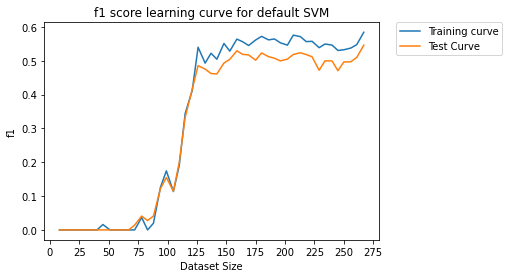

In [6]:
##Default learning Curve
train_sizes, train_scores, test_scores = learning_curve(SVC(random_state=42), X, y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.01,1.0,50), verbose=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training curve')
plt.plot(train_sizes, test_mean, label='Test Curve')
plt.xticks(list(range(0, 300, 25)))
plt.xlabel("Dataset Size")
plt.ylabel("f1")
plt.title("f1 score learning curve for default SVM")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

getF1(train_sizes, test_mean)


In [7]:
## Splitting data to training and testing sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

##RBF Kernel
params = [
    {
        'C': [0.5, 1, 10, 20, 50, 100, 150, 200],
        'gamma': [0.000001, 0.00001, 0.0001, 0.001, 0.1, 1],
    }
]

gs = GridSearchCV(SVC(random_state=42, kernel='rbf'),
                 param_grid = params, cv=10, n_jobs=-1, verbose=10, return_train_score=True, scoring='f1')
gs.fit(X_train, y_train)

##Best Results
best_parameter_rbf = gs.best_params_
best_score_rbf = gs.best_score_

print("best parameter: ", best_parameter_rbf)
print("best score: ", best_score_rbf)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
best parameter:  {'C': 150, 'gamma': 0.0001}
best score:  0.7316397053239159


In [8]:
results_data = pd.DataFrame(gs.cv_results_)
results_data
optimal_results_data = results_data.loc[results_data['param_gamma']==0.0001]
optimal_results_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
2,0.020022,0.004576,0.018855,0.018457,0.5,0.0001,"{'C': 0.5, 'gamma': 0.0001}",0.571429,0.421053,0.857143,...,0.583333,0.616279,0.619048,0.640000,0.593939,0.640449,0.644444,0.648045,0.626255,0.021419
8,0.015937,0.013350,0.008603,0.003529,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.636364,0.421053,0.857143,...,0.615385,0.651429,0.659091,0.670330,0.647399,0.644068,0.677419,0.677778,0.656962,0.019485
14,0.009100,0.001920,0.004850,0.000502,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.700000,0.526316,0.857143,...,0.686747,0.701754,0.695122,0.744681,0.682927,0.682927,0.760417,0.720000,0.714124,0.027030
20,0.010241,0.002251,0.006045,0.001499,20,0.0001,"{'C': 20, 'gamma': 0.0001}",0.761905,0.526316,0.900000,...,0.738095,0.751445,0.740741,0.765027,0.727273,0.731707,0.778378,0.733728,0.749022,0.016309
26,0.021101,0.005220,0.009667,0.003337,50,0.0001,"{'C': 50, 'gamma': 0.0001}",0.761905,0.761905,0.900000,...,0.811765,0.827586,0.816568,0.816092,0.790698,0.828402,0.846154,0.790698,0.816326,0.016030
32,0.012755,0.002006,0.005306,0.001155,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.761905,0.700000,0.900000,...,0.848837,0.847458,0.850575,0.868571,0.825581,0.840237,0.873563,0.848837,0.849550,0.015488
38,0.016077,0.003794,0.005002,0.000680,150,0.0001,"{'C': 150, 'gamma': 0.0001}",0.761905,0.700000,0.900000,...,0.842105,0.858757,0.857143,0.888889,0.843931,0.840237,0.880000,0.855491,0.856499,0.018412
44,0.017057,0.003513,0.006483,0.002094,200,0.0001,"{'C': 200, 'gamma': 0.0001}",0.761905,0.736842,0.900000,...,0.858824,0.877778,0.863636,0.900000,0.873563,0.858824,0.883721,0.873563,0.872202,0.014727


Text(0.5, 1.0, 'Validation for the SVM')

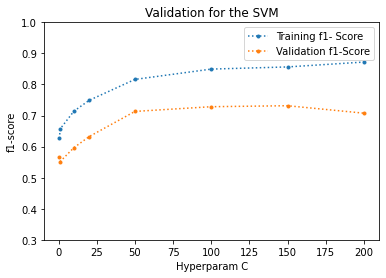

In [9]:
##GridSearch Plotting
fig, ax = plt.subplots()
optimal_results_data.plot(x='param_C', y='mean_train_score', label='Training f1- Score', ax=ax, marker='.', ls=':')
optimal_results_data.plot(x='param_C', y='mean_test_score', label='Validation f1-Score', ax=ax, marker='.', ls=':')

ax.set_xlabel('Hyperparam C')
ax.set_ylabel('f1-score')
ax.set_ylim(bottom=0.3, top=1.0)
ax.set_title("Validation for the SVM")

[learning_curve] Training set sizes: [  2   8  13  18  24  29  35  40  45  51  56  62  67  72  78  83  88  94
  99 105 110 115 121 126 132 137 142 148 153 159 164 169 175 180 186 191
 196 202 207 213 218 223 229 234 240 245 250 256 261 267]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 500 | elapsed:    0.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  93 out of 500 | elapsed:    0.7s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 144 out of 500 | elapsed:    0.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 195 out of 500 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 246 out of 500 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 297 out of 500 | elapsed:    1.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 348 out of 500 | elapsed:    1.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 399 out of 500 | elapsed:    2.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 450 out of 500 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished


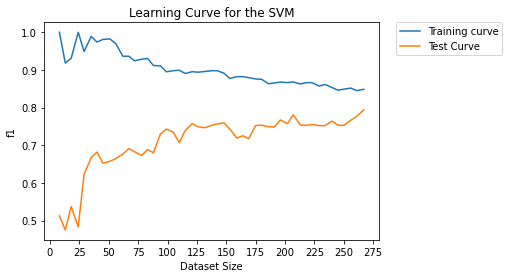

In [10]:
##learning Curve - rbf KERNEL
optimal_df = SVC(random_state=42, kernel='rbf', C=150, gamma=0.0001)
train_sizes, train_scores, test_scores = learning_curve(optimal_df, X, y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.01,1.0,50), verbose=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training curve')
plt.plot(train_sizes, test_mean, label='Test Curve')
plt.xticks(list(range(0, 300, 25)))
plt.xlabel("Dataset Size")
plt.ylabel("f1")
plt.title("Learning Curve for the SVM")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [11]:
##Predictions
pred = prediction(optimal_df, X_train, y_train, X_test, y_test)
printPredictions(pred)

Time spent for prediction:  0.023507356643676758
              precision    recall  f1-score   support

           0     0.7500    0.8571    0.8000        42
           1     0.7778    0.6364    0.7000        33

    accuracy                         0.7600        75
   macro avg     0.7639    0.7468    0.7500        75
weighted avg     0.7622    0.7600    0.7560        75

f1-Score:  0.7000000000000001


In [12]:
##sigmoid Kernel
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, test_size=0.3, train_size=0.7)
params = [
    {
        'C': [0.5, 1, 10, 20, 50, 100, 150, 200],
        'gamma': [0.000001, 0.00001, 0.0001, 0.001, 0.1, 1],
    }
]

gs = GridSearchCV(SVC(random_state=42, kernel='sigmoid'),
                 param_grid = params, cv=10, n_jobs=-1, verbose=10, return_train_score=True, scoring='f1')
gs.fit(X_train, y_train)

##Best Results
best_parameter_rbf = gs.best_params_
best_score_rbf = gs.best_score_

print("best parameter: ", best_parameter_rbf)
print("best score: ", best_score_rbf)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
best parameter:  {'C': 150, 'gamma': 1e-06}
best score:  0.6124166878872761


In [13]:
results_data = pd.DataFrame(gs.cv_results_)
results_data
optimal_results_data = results_data.loc[results_data['param_gamma']==0.000001]
optimal_results_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010742,0.001679,0.007509,0.002423,0.5,0.000001,"{'C': 0.5, 'gamma': 1e-06}",0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.009005,0.001587,0.007352,0.003667,1,0.000001,"{'C': 1, 'gamma': 1e-06}",0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,0.014496,0.001952,0.009922,0.006015,10,0.000001,"{'C': 10, 'gamma': 1e-06}",0.181818,0.333333,0.000000,...,0.067416,0.108696,0.378378,0.330275,0.204082,0.148936,0.353982,0.420168,0.249737,0.132572
18,0.009972,0.001852,0.005985,0.001216,20,0.000001,"{'C': 20, 'gamma': 1e-06}",0.266667,0.761905,0.461538,...,0.476190,0.524823,0.540146,0.517483,0.524823,0.462687,0.523490,0.540541,0.513574,0.028743
24,0.009265,0.002010,0.005377,0.001378,50,0.000001,"{'C': 50, 'gamma': 1e-06}",0.266667,0.818182,0.666667,...,0.567568,0.592105,0.653595,0.592105,0.607595,0.593548,0.633540,0.611465,0.609861,0.026282
30,0.008225,0.001098,0.005286,0.001961,100,0.000001,"{'C': 100, 'gamma': 1e-06}",0.470588,0.818182,0.750000,...,0.578947,0.584416,0.662420,0.623377,0.602564,0.603774,0.670659,0.646341,0.624173,0.033012
36,0.010309,0.002297,0.006542,0.002952,150,0.000001,"{'C': 150, 'gamma': 1e-06}",0.470588,0.818182,0.750000,...,0.596026,0.602564,0.662420,0.624204,0.620253,0.637500,0.670659,0.654545,0.636802,0.026405
42,0.009829,0.002358,0.005457,0.001450,200,0.000001,"{'C': 200, 'gamma': 1e-06}",0.470588,0.818182,0.666667,...,0.596026,0.601307,0.679245,0.662577,0.611465,0.641975,0.666667,0.662651,0.640108,0.029984


Text(0.5, 1.0, 'Validation for the SVM')

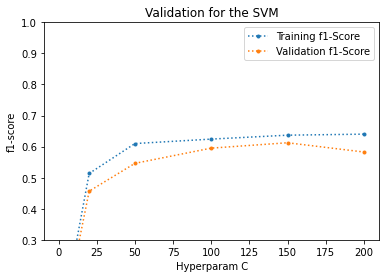

In [14]:
##GridSearch Plotting
fig, ax = plt.subplots()
optimal_results_data.plot(x='param_C', y='mean_train_score', label='Training f1-Score', ax=ax, marker='.', ls=':')
optimal_results_data.plot(x='param_C', y='mean_test_score', label='Validation f1-Score', ax=ax, marker='.', ls=':')

ax.set_xlabel('Hyperparam C')
ax.set_ylabel('f1-score')
ax.set_ylim(bottom=0.3, top=1.0)
ax.set_title("Validation for the SVM")

[learning_curve] Training set sizes: [  2   8  13  18  24  29  35  40  45  51  56  62  67  72  78  83  88  94
  99 105 110 115 121 126 132 137 142 148 153 159 164 169 175 180 186 191
 196 202 207 213 218 223 229 234 240 245 250 256 261 267]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 500 | elapsed:    2.5s remaining:   27.4s
[Parallel(n_jobs=-1)]: Done  93 out of 500 | elapsed:    2.6s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done 144 out of 500 | elapsed:    2.8s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done 195 out of 500 | elapsed:    2.9s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 246 out of 500 | elapsed:    3.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 297 out of 500 | elapsed:    3.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 348 out of 500 | elapsed:    3.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 399 out of 500 | elapsed:    3.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 450 out of 500 | elapsed:    3.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.7s finished


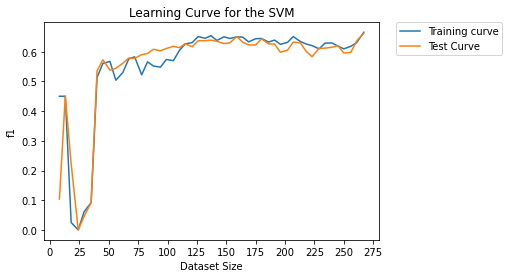

In [17]:
##learning Curve - rbf SIGMOID
optimal_df = SVC(random_state=42, kernel='sigmoid', C=150, gamma=0.000001)
train_sizes, train_scores, test_scores = learning_curve(optimal_df, X, y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.01,1.0,50), verbose=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training curve')
plt.plot(train_sizes, test_mean, label='Test Curve')
plt.xticks(list(range(0, 300, 25)))
plt.xlabel("Dataset Size")
plt.ylabel("f1")
plt.title("Learning Curve for the SVM")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [18]:
##Predictions
pred = prediction(optimal_df, X_train, y_train, X_test, y_test)
printPredictions(pred)

Time spent for prediction:  0.015203237533569336
              precision    recall  f1-score   support

           0     0.6719    0.8776    0.7611        49
           1     0.7692    0.4878    0.5970        41

    accuracy                         0.7000        90
   macro avg     0.7206    0.6827    0.6790        90
weighted avg     0.7162    0.7000    0.6863        90

f1-Score:  0.5970149253731344
